In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Se define un vector de datos para entrenar la red

In [2]:
datos = pd.read_csv('ajustado.csv', parse_dates=True,index_col=0)

guarda los registros corresponeidntes a los nodos para cada periodos de medición

In [3]:
nodo={}
for periodo in [1,2,3]:
    for node in [2,3,5]:
        nodo[str(node)+str(periodo)] = pd.read_csv('nodo%d_periodo%d.csv'%(node,periodo), parse_dates=True,index_col=0)
        nodo[str(node)+str(periodo)] = nodo[str(node)+str(periodo)].drop(columns=['HORA'])

### Gráficas de los periodos de medición, para los nodos...

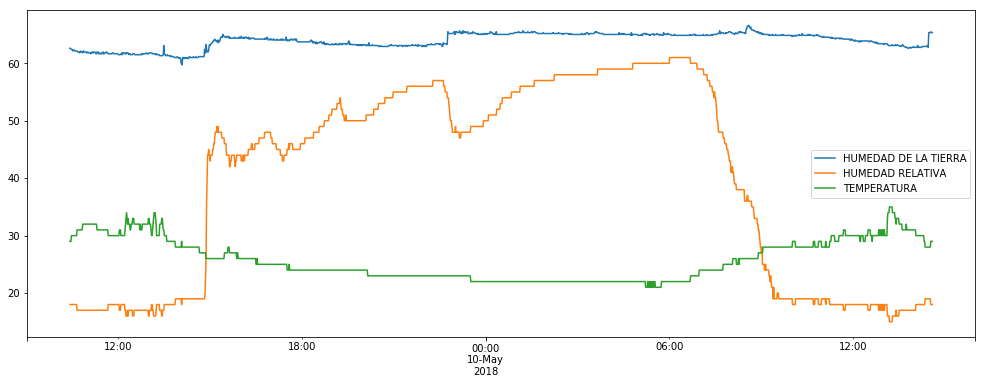

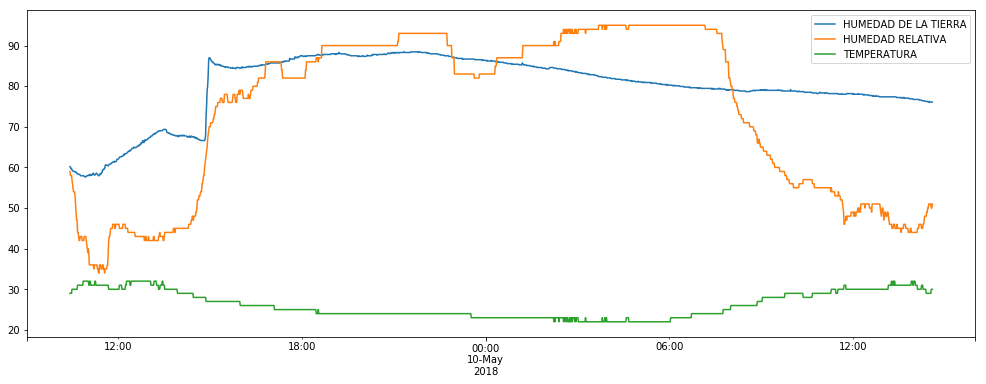

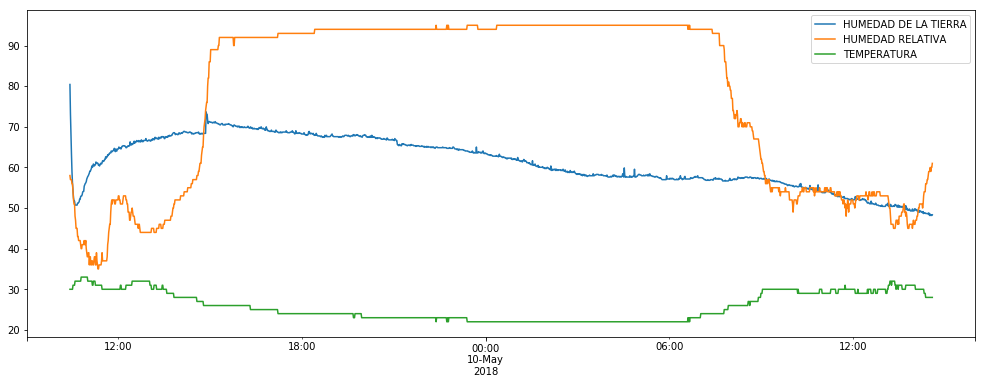

In [4]:
nodo['21'].iloc[:,[0,1,3]].plot(figsize=[17,6])
nodo['31'].iloc[:,[0,1,3]].plot(figsize=[17,6])
nodo['51'].iloc[:,[0,1,3]].plot(figsize=[17,6])

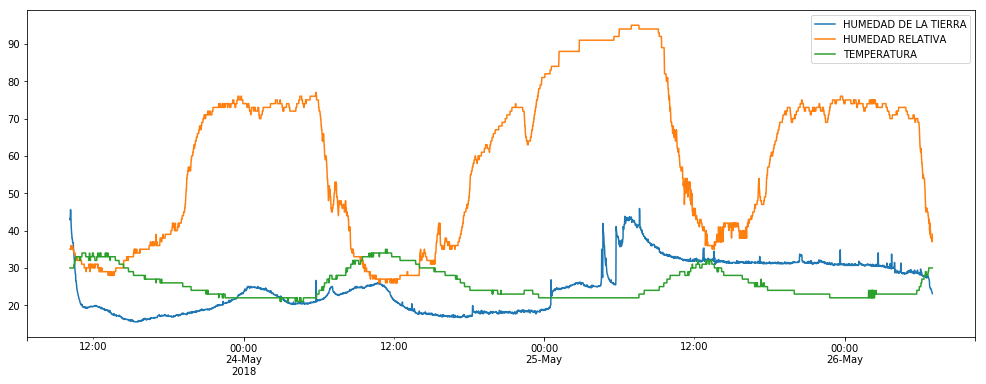

In [5]:
nodo['52'].iloc[:,[0,1,3]].plot(figsize=[17,6])

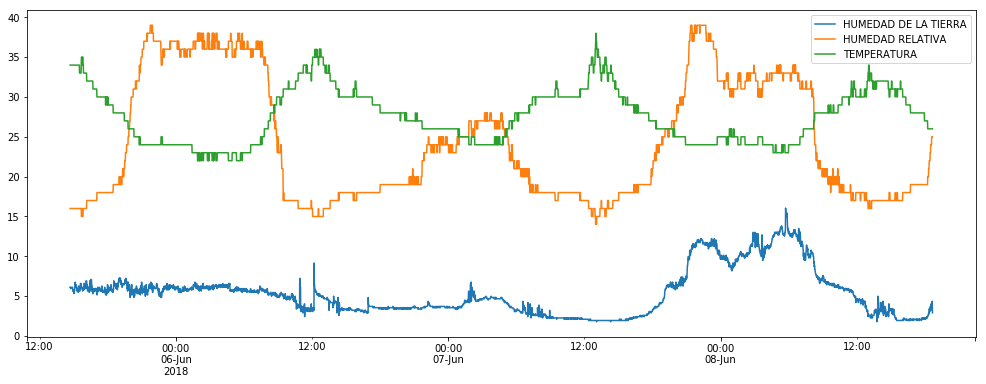

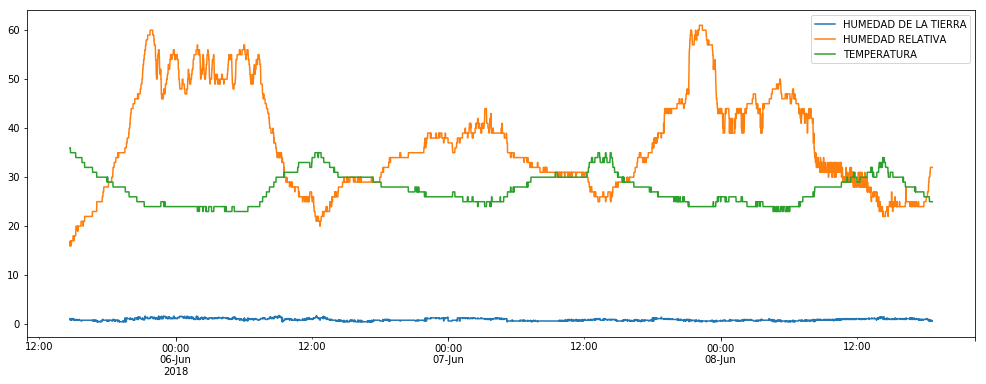

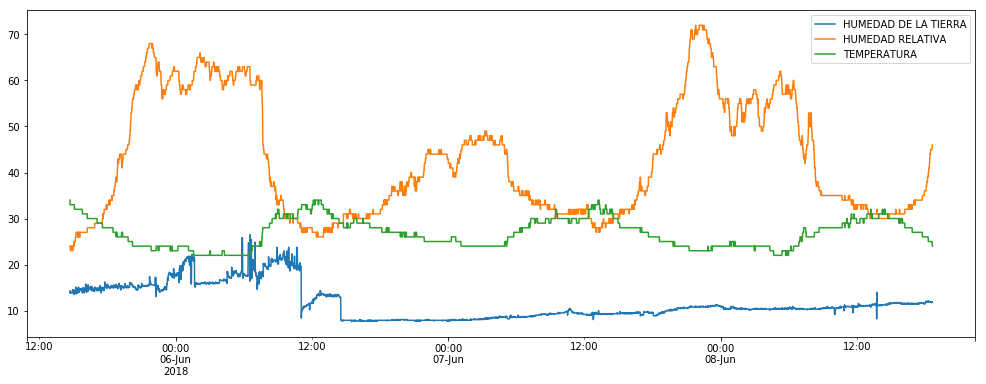

In [6]:
nodo['23'].iloc[:,[0,1,3]].plot(figsize=[17,6])
nodo['33'].iloc[:,[0,1,3]].plot(figsize=[17,6])
nodo['53'].iloc[:,[0,1,3]].plot(figsize=[17,6])

Descripción del dataframe datos

In [7]:
datos.describe()

,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA
count,4559.000000,4559.000000,4559.000000,4559.000000
mean,5.312196,24.382979,3025.985523,27.510419
std,2.872592,7.677451,2868.217255,3.297494
min,1.780000,14.000000,0.000000,22.000000
25%,3.220000,18.000000,0.000000,24.000000
50%,4.990000,21.000000,5630.000000,28.000000
75%,6.000000,32.000000,5835.000000,30.000000
max,14.000000,39.000000,5912.000000,35.000000


Importa la librería que permite separar el conjunto de entrenamiento y de prueba de los datos

In [9]:
X = datos.values
y_true = np.array(datos)

Descripción de el dataset escogido para probar el modelo

In [12]:
y_true.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [11]:
probar = nodo['21'].copy()
nodo['21'].describe()

,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA
count,1692.000000,1692.000000,1692.000000,1692.000000
mean,63.943156,40.003546,4933.079196,25.693262
std,1.319795,17.177956,1205.376045,3.504648
min,59.720000,15.000000,269.000000,21.000000
25%,63.090000,19.000000,4322.000000,22.000000
50%,64.370000,47.000000,5771.000000,24.000000
75%,65.020000,56.000000,5870.000000,28.000000
max,66.620000,61.000000,5941.000000,35.000000


Importa librerias para para contruir el modelo

In [ ]:
# importa el modelo secuencial
from keras.models import Sequential
# importa la capa densa
from keras.layers import Dense
# Importa el optimizador de Adam y de SGD
# El optimizador se usa al momento de compilar
# Adam: Método de optimización estocástico
# SGD: Optimizador de descenso de gradiente estocástico
from keras.optimizers import Adam, SGD
import numpy
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
probar = scaler.fit_transform(probar)
data = numpy.reshape(data, (data.shape[0], data.shape[1],1))
probar = numpy.reshape(probar, (probar.shape[0], probar.shape[1],1))

## Define el modelo y presenta sus características

In [ ]:
batch_size = 1
# define el modelo secuencial
model = Sequential()
# agrega una capa densa con cuatro neuronas y una forma de entrada (None,4)
model.add(Dense(4,input_shape=(4,)))
# presenta la scaracterísticas del modelo
model.summary()

## Compila el modelo

In [ ]:
# compila el modelo utilizando el optimizador de Adam y definiendo la métrica MSE
model.compile(Adam(lr=0.8), 'mean_squared_error')

## Ajuste del modelo

In [ ]:
model.fit(X, y_true, epochs=20,batch_size=batch_size)

In [ ]:
y_pred = model.predict(X)

In [ ]:
plt.plot(X, y_pred, color='red')

## Pesos del modelo

In [ ]:
W, B = model.get_weights()
display(W,B)

### Evaluar el desempeño del modelo

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

## Se divide el conjunto de datos en set de entrenamiento y de prueba

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

## Se desentrena al modelo

In [ ]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

## Entrenamiento del conjunto de prueba

In [ ]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
y_train_pred = model.predict(y_train).ravel()
y_test_pred = model.predict(y_test).ravel()

## Importa el error cuadrado medio MSE

Calcular el MSE de manera multivariable???

from sklearn.metrics import mean_squared_error as mse

In [ ]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))